<a href="https://colab.research.google.com/github/Drinkler/Yield-Prediction/blob/main/Yield_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# General

In [1487]:
# Imports
import numpy as np
import pandas as pd

import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [1488]:
# Define url to data
resource_folder = 'https://raw.githubusercontent.com/Sawcrate0/Vacances-ski-2/main/res'

rainfall_url = '{}/rainfall.csv'.format(resource_folder)
temperature_url = '{}/temp.csv'.format(resource_folder)
yield_url = '{}/yield.csv'.format(resource_folder)

In [1489]:
# Load data
rainfall_data = pd.read_csv(rainfall_url, sep=', ')
temperature_data = pd.read_csv(temperature_url, sep=', ')
yield_data = pd.read_csv(yield_url, sep=', ')

C:\Users\nicol\AppData\Local\Temp\ipykernel_12676\343149428.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  rainfall_data = pd.read_csv(rainfall_url, sep=', ')
C:\Users\nicol\AppData\Local\Temp\ipykernel_12676\343149428.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  temperature_data = pd.read_csv(temperature_url, sep=', ')
C:\Users\nicol\AppData\Local\Temp\ipykernel_12676\343149428.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by

#Data Preparation


## Rainfall data

In [1490]:
rainfall_data

,Rainfall,Year,Element,Area
0,3.680000,2010,JUN,Anuppur
1,13.399120,2010,JUL,Anuppur
2,9.782032,2010,AUG,Anuppur
3,8.332526,2010,SEP,Anuppur
4,1.451772,2010,OCT,Anuppur
...,...,...,...,...
2755,14.133820,2019,JUL,Vidisha
2756,20.064700,2019,AUG,Vidisha
2757,20.979780,2019,SEP,Vidisha
2758,1.074892,2019,OCT,Vidisha


In [1491]:
rainfall_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2760 entries, 0 to 2759
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rainfall  2760 non-null   float64
 1   Year      2760 non-null   int64  
 2   Element   2760 non-null   object 
 3   Area      2760 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 86.4+ KB


In [1492]:
rainfall_data.describe()

,Rainfall,Year
count,2760.000000,2760.000000
mean,6.102753,2014.500000
std,5.813051,2.872802
min,0.000000,2010.000000
25%,0.634954,2012.000000
50%,4.725356,2014.500000
75%,10.129935,2017.000000
max,27.128330,2019.000000


In [1493]:
# Number of disctricts
len(rainfall_data['Area'].unique())

46

In [1494]:
# Number of years (1901 - 2016)
len(rainfall_data['Year'].unique())

10

In [1495]:
# 6 months from Anuppur
rainfall_data.head(6)

,Rainfall,Year,Element,Area
0,3.680000,2010,JUN,Anuppur
1,13.399120,2010,JUL,Anuppur
2,9.782032,2010,AUG,Anuppur
3,8.332526,2010,SEP,Anuppur
4,1.451772,2010,OCT,Anuppur
5,0.177238,2010,NOV,Anuppur


In [1496]:
# Rain data in years for each Area
rainfall_df = rainfall_data.groupby(['Year', 'Area','Element'], as_index=False, axis=0).sum()
rainfall_df

,Year,Area,Element,Rainfall
0,2010,Anuppur,AUG,9.782032
1,2010,Anuppur,JUL,13.399120
2,2010,Anuppur,JUN,3.680000
3,2010,Anuppur,NOV,0.177238
4,2010,Anuppur,OCT,1.451772
...,...,...,...,...
2755,2019,Vidisha,JUL,14.133820
2756,2019,Vidisha,JUN,2.978857
2757,2019,Vidisha,NOV,0.218000
2758,2019,Vidisha,OCT,1.074892


## Temperature data

In [1497]:
temperature_data

,Temperature - (Celsius),Year,Element,Area
0,43.0467,2010,JUN,Anuppur
1,35.1668,2010,JUL,Anuppur
2,30.3092,2010,AUG,Anuppur
3,29.4275,2010,SEP,Anuppur
4,30.0325,2010,OCT,Anuppur
...,...,...,...,...
2755,36.7942,2019,JUL,Vidisha
2756,26.9944,2019,AUG,Vidisha
2757,28.7813,2019,SEP,Vidisha
2758,31.8626,2019,OCT,Vidisha


In [1498]:
temperature_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2760 entries, 0 to 2759
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Temperature - (Celsius)  2760 non-null   float64
 1   Year                     2760 non-null   int64  
 2   Element                  2760 non-null   object 
 3   Area                     2760 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 86.4+ KB


In [1499]:
temperature_data.describe()

,Temperature - (Celsius),Year
count,2760.000000,2760.000000
mean,33.821906,2014.500000
std,5.157327,2.872802
min,7.005000,2010.000000
25%,30.005100,2012.000000
50%,32.498250,2014.500000
75%,36.793150,2017.000000
max,47.872600,2019.000000


In [1500]:
# Number of disctricts
len(temperature_data['Area'].unique())

46

In [1501]:
# Number of years (2010 - 2019)
len(temperature_data['Year'].unique())

10

In [1502]:
# 6 months from Anuppur
temperature_data.head(6)

,Temperature - (Celsius),Year,Element,Area
0,43.0467,2010,JUN,Anuppur
1,35.1668,2010,JUL,Anuppur
2,30.3092,2010,AUG,Anuppur
3,29.4275,2010,SEP,Anuppur
4,30.0325,2010,OCT,Anuppur
5,29.6325,2010,NOV,Anuppur


In [1503]:
# Average temperature data in years for each area
temperature_df =temperature_data.groupby(['Year', 'Area','Element'], as_index=False, axis=0).mean()
temperature_df

,Year,Area,Element,Temperature - (Celsius)
0,2010,Anuppur,AUG,30.3092
1,2010,Anuppur,JUL,35.1668
2,2010,Anuppur,JUN,43.0467
3,2010,Anuppur,NOV,29.6325
4,2010,Anuppur,OCT,30.0325
...,...,...,...,...
2755,2019,Vidisha,JUL,36.7942
2756,2019,Vidisha,JUN,47.3017
2757,2019,Vidisha,NOV,32.3157
2758,2019,Vidisha,OCT,31.8626



## Yield data

In [1504]:
yield_data

,Domain,Area,Element,Item,Year,Unit,Value
0,Crops,Anuppur,Yield,Soybean,2010,hg/ha,4023.14
1,Crops,Ashoknagar,Yield,Soybean,2010,hg/ha,12807.08
2,Crops,Balaghat,Yield,Soybean,2010,hg/ha,17419.35
3,Crops,Barwani,Yield,Soybean,2010,hg/ha,2869.52
4,Crops,Betul,Yield,Soybean,2010,hg/ha,10958.32
...,...,...,...,...,...,...,...
455,Crops,Sidhi,Yield,Soybean,2019,hg/ha,3636.36
456,Crops,Tikamgarh,Yield,Soybean,2019,hg/ha,4189.92
457,Crops,Ujjain,Yield,Soybean,2019,hg/ha,4660.01
458,Crops,Umaria,Yield,Soybean,2019,hg/ha,4932.89


In [1505]:
yield_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460 entries, 0 to 459
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Domain   460 non-null    object 
 1   Area     460 non-null    object 
 2   Element  460 non-null    object 
 3   Item     460 non-null    object 
 4   Year     460 non-null    int64  
 5   Unit     460 non-null    object 
 6   Value    460 non-null    float64
dtypes: float64(1), int64(1), object(5)
memory usage: 25.3+ KB


In [1506]:
yield_data.describe()

,Year,Value
count,460.000000,460.000000
mean,2014.500000,9709.427196
std,2.875408,4051.492134
min,2010.000000,0.000000
25%,2012.000000,6612.902500
50%,2014.500000,9354.415000
75%,2017.000000,12727.270000
max,2019.000000,24885.150000


In [1507]:
# Number of disctricts
len(yield_data['Area'].unique())

46

In [1508]:
# Number of years (1961 - 2019)
len(yield_data['Year'].unique())

10

In [1509]:
# Remove unnecessary columns
yield_df = yield_data.drop(['Domain', 'Element'], axis=1)
yield_df

,Area,Item,Year,Unit,Value
0,Anuppur,Soybean,2010,hg/ha,4023.14
1,Ashoknagar,Soybean,2010,hg/ha,12807.08
2,Balaghat,Soybean,2010,hg/ha,17419.35
3,Barwani,Soybean,2010,hg/ha,2869.52
4,Betul,Soybean,2010,hg/ha,10958.32
...,...,...,...,...,...
455,Sidhi,Soybean,2019,hg/ha,3636.36
456,Tikamgarh,Soybean,2019,hg/ha,4189.92
457,Ujjain,Soybean,2019,hg/ha,4660.01
458,Umaria,Soybean,2019,hg/ha,4932.89


## Merging

In [1510]:
rainfall_df.rename({'Rainfall': 'Rainfall (cm)'}, axis=1, inplace=True)

In [1511]:
temperature_df.rename({'Temperature - (Celsius)': 'Temperature (Celsius)'}, axis=1, inplace=True)

In [1512]:
yield_df.rename({'Area': 'Area', 'Value': 'Yield (hg/ha)'}, axis=1, inplace=True)
yield_df.drop('Unit', axis=1, inplace=True)

In [1513]:
rain_temp_df = pd.merge(rainfall_df, temperature_df, on=['Area', 'Year','Element'])
rain_temp_yield_df = pd.merge(rain_temp_df, yield_df, on=['Area', 'Year'])
data = rain_temp_yield_df[['Year', 'Area', 'Item', 'Rainfall (cm)', 'Temperature (Celsius)', 'Yield (hg/ha)']]
data

,Year,Area,Item,Rainfall (cm),Temperature (Celsius),Yield (hg/ha)
0,2010,Anuppur,Soybean,9.782032,30.3092,4023.14
1,2010,Anuppur,Soybean,13.399120,35.1668,4023.14
2,2010,Anuppur,Soybean,3.680000,43.0467,4023.14
3,2010,Anuppur,Soybean,0.177238,29.6325,4023.14
4,2010,Anuppur,Soybean,1.451772,30.0325,4023.14
...,...,...,...,...,...,...
2755,2019,Vidisha,Soybean,14.133820,36.7942,5760.01
2756,2019,Vidisha,Soybean,2.978857,47.3017,5760.01
2757,2019,Vidisha,Soybean,0.218000,32.3157,5760.01
2758,2019,Vidisha,Soybean,1.074892,31.8626,5760.01


In [1514]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2760 entries, 0 to 2759
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   2760 non-null   int64  
 1   Area                   2760 non-null   object 
 2   Item                   2760 non-null   object 
 3   Rainfall (cm)          2760 non-null   float64
 4   Temperature (Celsius)  2760 non-null   float64
 5   Yield (hg/ha)          2760 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 150.9+ KB


In [1515]:
data.describe()

,Year,Rainfall (cm),Temperature (Celsius),Yield (hg/ha)
count,2760.000000,2760.000000,2760.000000,2760.000000
mean,2014.500000,6.102753,33.821906,9709.427196
std,2.872802,5.813051,5.157327,4047.819309
min,2010.000000,0.000000,7.005000,0.000000
25%,2012.000000,0.634954,30.005100,6612.902500
50%,2014.500000,4.725356,32.498250,9354.415000
75%,2017.000000,10.129935,36.793150,12727.270000
max,2019.000000,27.128330,47.872600,24885.150000


In [1516]:
# Number of disctricts
len(data.Area.unique())

46

In [1517]:
# Number of years (1990 - 2016)
len(data.Year.unique())

10

# Data Exploration

## Rainfall data

In [1518]:
rainfall_df

,Year,Area,Element,Rainfall (cm)
0,2010,Anuppur,AUG,9.782032
1,2010,Anuppur,JUL,13.399120
2,2010,Anuppur,JUN,3.680000
3,2010,Anuppur,NOV,0.177238
4,2010,Anuppur,OCT,1.451772
...,...,...,...,...
2755,2019,Vidisha,JUL,14.133820
2756,2019,Vidisha,JUN,2.978857
2757,2019,Vidisha,NOV,0.218000
2758,2019,Vidisha,OCT,1.074892


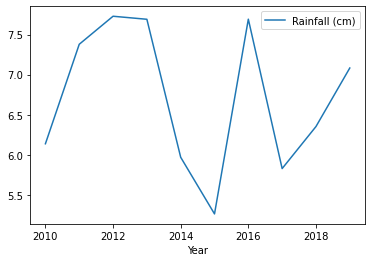

In [1519]:
rainfall_df.loc[rainfall_df['Area'] == 'Anuppur'].groupby('Year').mean().plot()
plt.show()

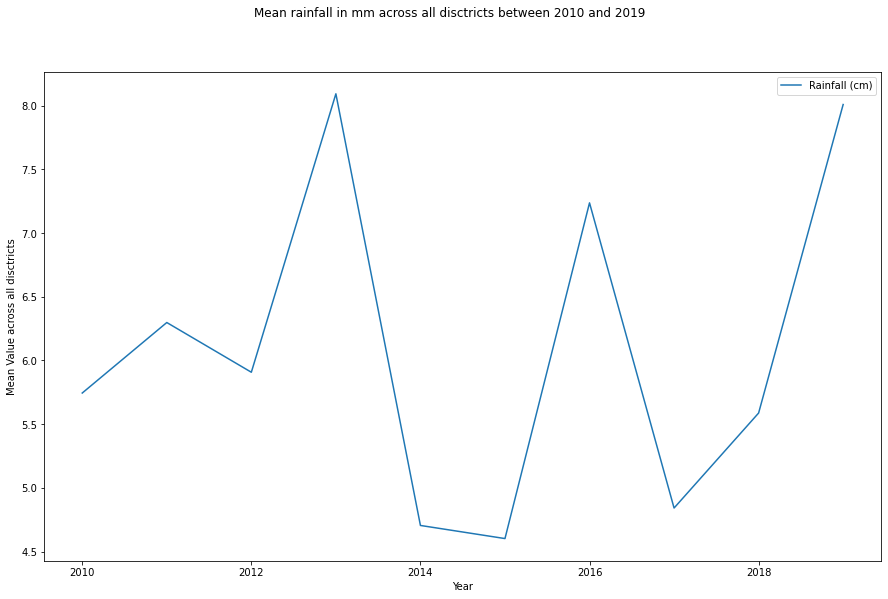

In [1520]:
# prepare data
temp_data = rainfall_df.groupby('Year').mean()

# plot data
fig, ax = plt.subplots(figsize=(15,9))
fig.suptitle('Mean rainfall in mm across all disctricts between 2010 and 2019')

temp_data.plot(ax=ax)

ax.set_ylabel('Mean Value across all disctricts')
ax.set_xlabel('Year')

plt.show()

## Temperature data

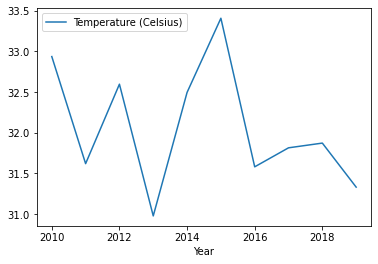

In [1521]:
temperature_df.loc[temperature_df['Area'] == 'Anuppur'].groupby('Year').mean().plot()
plt.show()

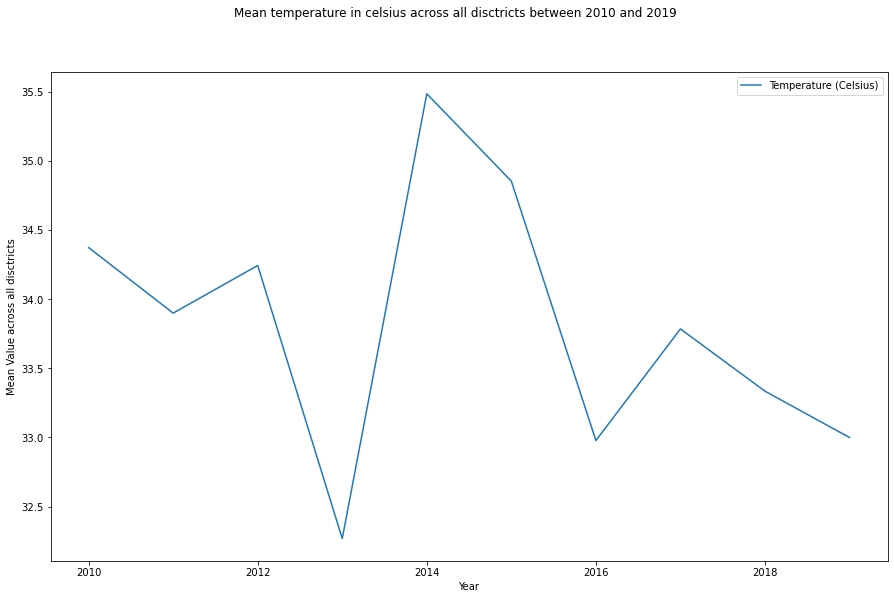

In [1522]:
# prepare data
temp_data = temperature_df.groupby('Year').mean()

# plot data
fig, ax = plt.subplots(figsize=(15,9))
fig.suptitle('Mean temperature in celsius across all disctricts between 2010 and 2019')

temp_data.plot(ax=ax)

ax.set_ylabel('Mean Value across all disctricts')
ax.set_xlabel('Year')

plt.show()

## Yield data

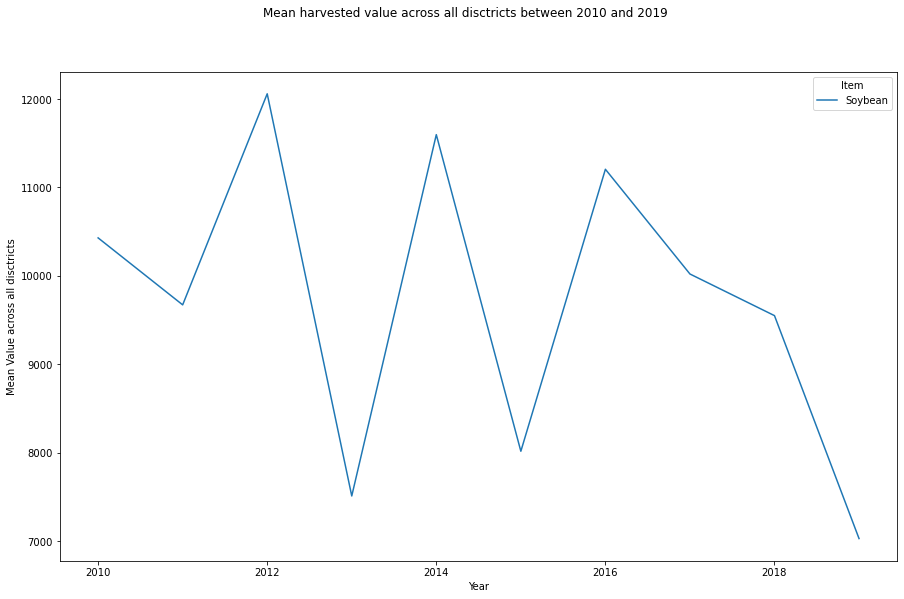

In [1523]:
    # prepare data
yield_mean = yield_data.groupby(['Year', 'Item']).mean()

# plot data
fig, ax = plt.subplots(figsize=(15,9))
fig.suptitle('Mean harvested value across all disctricts between 2010 and 2019')

yield_mean['Value'].unstack().plot(ax=ax)

ax.set_ylabel('Mean Value across all disctricts')
ax.set_xlabel('Year')

plt.show()

## Merged data

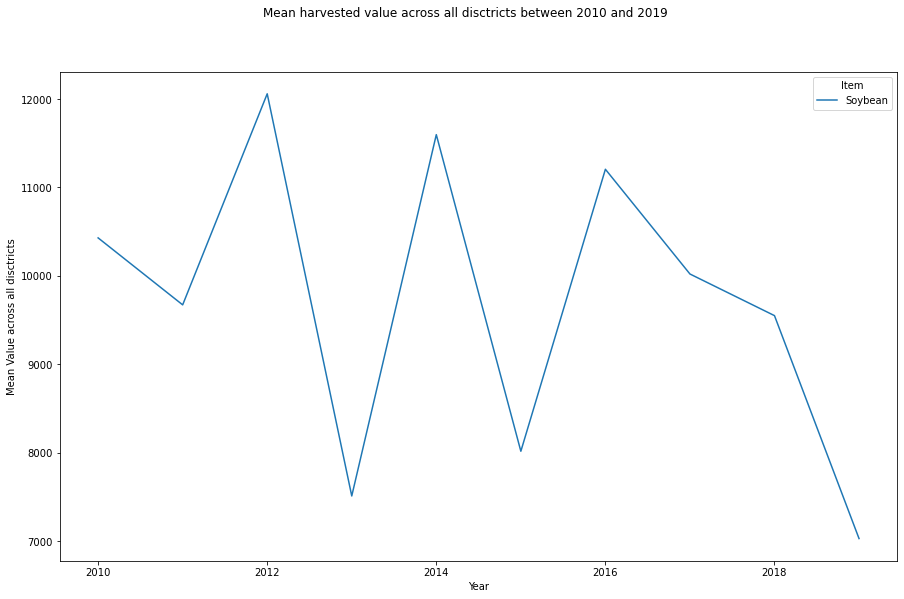

In [1524]:
# prepare data
temp_data = data.groupby(['Year', 'Item']).mean()

# plot data
fig, ax = plt.subplots(figsize=(15,9))
fig.suptitle('Mean harvested value across all disctricts between 2010 and 2019')

temp_data['Yield (hg/ha)'].unstack().plot(ax=ax)

ax.set_ylabel('Mean Value across all disctricts')
ax.set_xlabel('Year')

plt.show()

C:\Users\nicol\AppData\Local\Temp\ipykernel_12676\577026599.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


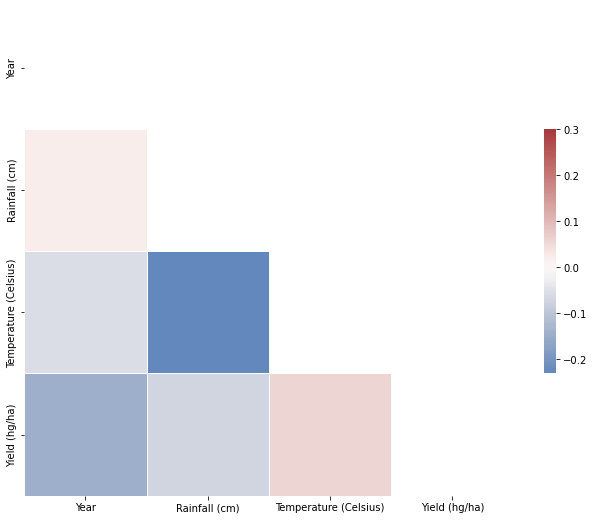

In [1525]:
corr = data.select_dtypes(include=[np.number]).corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.palette="vlag"

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

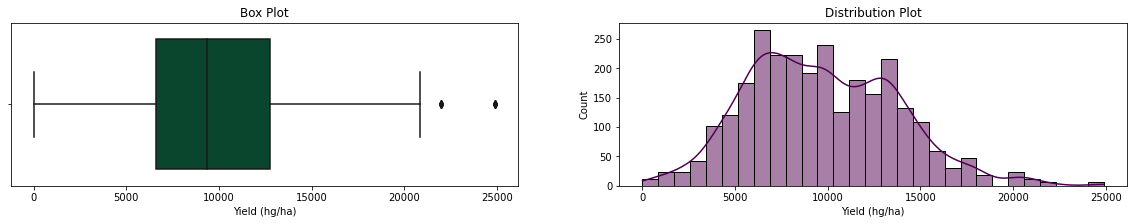

In [1526]:
plt.figure(figsize=(20,3))

plt.subplot(1,2,1)
sns.boxplot(x=data['Yield (hg/ha)'],color='#005030')
plt.title(f'Box Plot')

plt.subplot(1,2,2)
sns.histplot(x=data['Yield (hg/ha)'], color='#500050', kde=True)
plt.title(f'Distribution Plot')
plt.show()

# Data Preprocessing

## One Hot Encoding

In [1527]:
data.shape
data

,Year,Area,Item,Rainfall (cm),Temperature (Celsius),Yield (hg/ha)
0,2010,Anuppur,Soybean,9.782032,30.3092,4023.14
1,2010,Anuppur,Soybean,13.399120,35.1668,4023.14
2,2010,Anuppur,Soybean,3.680000,43.0467,4023.14
3,2010,Anuppur,Soybean,0.177238,29.6325,4023.14
4,2010,Anuppur,Soybean,1.451772,30.0325,4023.14
...,...,...,...,...,...,...
2755,2019,Vidisha,Soybean,14.133820,36.7942,5760.01
2756,2019,Vidisha,Soybean,2.978857,47.3017,5760.01
2757,2019,Vidisha,Soybean,0.218000,32.3157,5760.01
2758,2019,Vidisha,Soybean,1.074892,31.8626,5760.01


In [1528]:
from sklearn.preprocessing import OneHotEncoder

df_onehot = pd.get_dummies(data, columns=['Area', 'Item'], prefix=['Area', 'Item'])
data = df_onehot.loc[:, df_onehot.columns != 'Yield (hg/ha)']
data['Yield (hg/ha)'] = df_onehot['Yield (hg/ha)']

In [1529]:
data.shape

(2760, 51)

## Backward Elimination

In [1530]:
import statsmodels.api as sm

y = data['Yield (hg/ha)']
X = data.drop('Yield (hg/ha)', axis=1)

cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p = []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[0:], index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break

data = data[cols]
data.insert(len(data.columns), 'Yield (hg/ha)', y)

In [1531]:
data.shape

(2760, 50)

## Feature Scaling

In [1532]:
data.shape

(2760, 50)

In [1533]:
from sklearn.preprocessing import MinMaxScaler

y = data['Yield (hg/ha)']
X = data.drop('Yield (hg/ha)', axis=1)

scaler = MinMaxScaler()
data_without_yield = pd.DataFrame(scaler.fit_transform(X), index=y.index)
data_without_yield
data_without_yield.columns = X.columns
data_without_yield.insert(len(data_without_yield.columns), 'Yield (hg/ha)', y)

data = data_without_yield

In [1534]:
data.shape

(2760, 50)

# Modeling

In [1535]:
y = data['Yield (hg/ha)']
X = data.drop('Yield (hg/ha)', axis=1)

In [1536]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [1537]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [1538]:
def plot_regression_results(ax, y_test, y_pred, title, estimated_time, scores):

  # linear least-squares
  slope, intercept, rvalue, pvalue, stderr = linregress(y_test, y_pred)
  ax.plot([y_test.min(), y_test.max()], [intercept+y_test.min()*slope, intercept+y_test.max()*slope], '--r')

  ax.scatter(y_test, y_pred, alpha=0.7)

  # Anzeigen der Werte in einer Box
  extra = plt.Rectangle((0, 0), 0, 0, fc="w", fill=False,
                          edgecolor='none', linewidth=0)
  ax.legend([extra], [scores], loc='upper left')

  ax.set_xlabel('Actual values in tonnes')
  ax.set_ylabel('Predictes values in tonnes')
  ax.set_title('{}\nTrained in {:.2f} Milliseconds'.format(name, estimated_time*1000))

C:\Users\nicol\AppData\Local\Temp\ipykernel_12676\4111968303.py:3: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
C:\Users\nicol\AppData\Local\Temp\ipykernel_12676\4111968303.py:3: RuntimeWarning: invalid value encountered in true_divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
c:\Users\nicol\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\nicol\AppData\Local\Temp\ipykernel_12676\4111968303.py:3: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
C:\Users\nicol\AppData\Local\Temp\ipykernel_12676\4111968303.py:3: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
C:\Users\

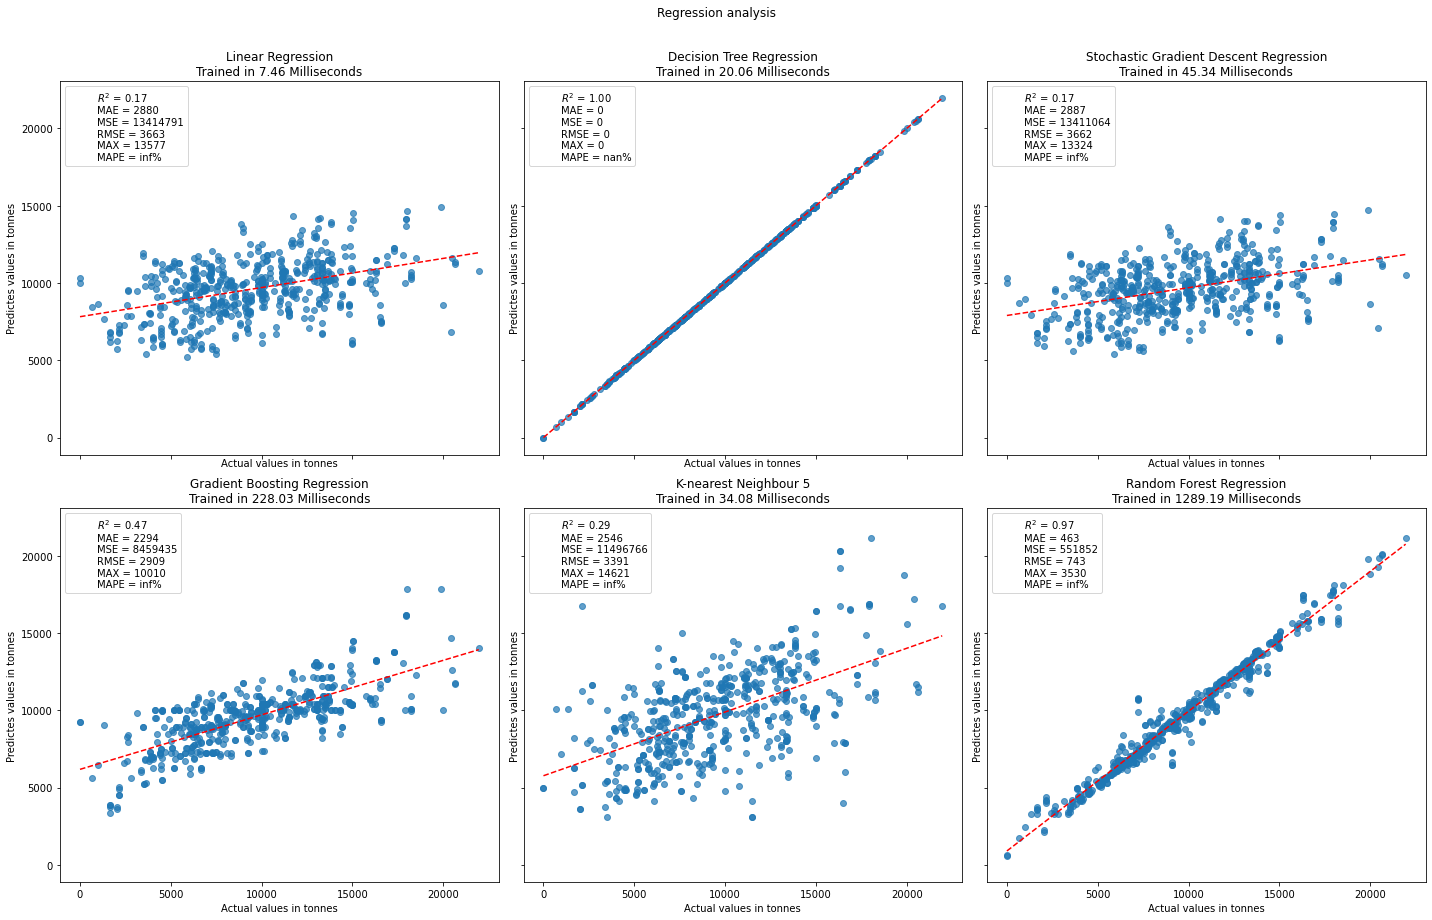

In [1539]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, max_error
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import cross_validate, cross_val_predict
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor

import time
from scipy.stats import linregress

lin = LinearRegression()
dtr = DecisionTreeRegressor()
sgd = SGDRegressor(loss='squared_loss')
gbr = GradientBoostingRegressor()
knn = KNeighborsRegressor(n_neighbors=5)
rfr = RandomForestRegressor()

# Verwendete Regressionen
estimators = [('Linear Regression', lin),
              ('Decision Tree Regression', dtr),
              ('Stochastic Gradient Descent Regression', sgd),
              ('Gradient Boosting Regression', gbr),
              ('K-nearest Neighbour 5', knn),
              ('Random Forest Regression', rfr)]

# Festlegen des Subplots
fig, axs = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True, figsize=(20, 13))
axs = np.ravel(axs)

for ax, (name, est) in zip(axs, estimators):
  start_time = time.time()
  # Training the model 
  est.fit(X_train, y_train)
  y_pred = est.predict(X_test)
  estimated_time = time.time() - start_time

  # View the model

  plot_regression_results(ax, y_test, y_pred, name, estimated_time, 
                          (r'$R^2$ = {:.2f}' + '\n' + 
                          r'MAE = {:.0f}' + '\n' +
                          r'MSE = {:.0f}' + '\n' +
                          r'RMSE = {:.0f}' + '\n' +
                          r'MAX = {:.0f}' + '\n' +
                          r'MAPE = {:.2f}%')
                          .format(r2_score(y_test, y_pred),
                                  mean_absolute_error(y_test, y_pred),
                                  mean_squared_error(y_test, y_pred),
                                  mean_squared_error(y_test, y_pred, squared=False),
                                  max_error(y_test, y_pred),
                                  mean_absolute_percentage_error(y_test, y_pred)))
  
plt.suptitle('Regression analysis')
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

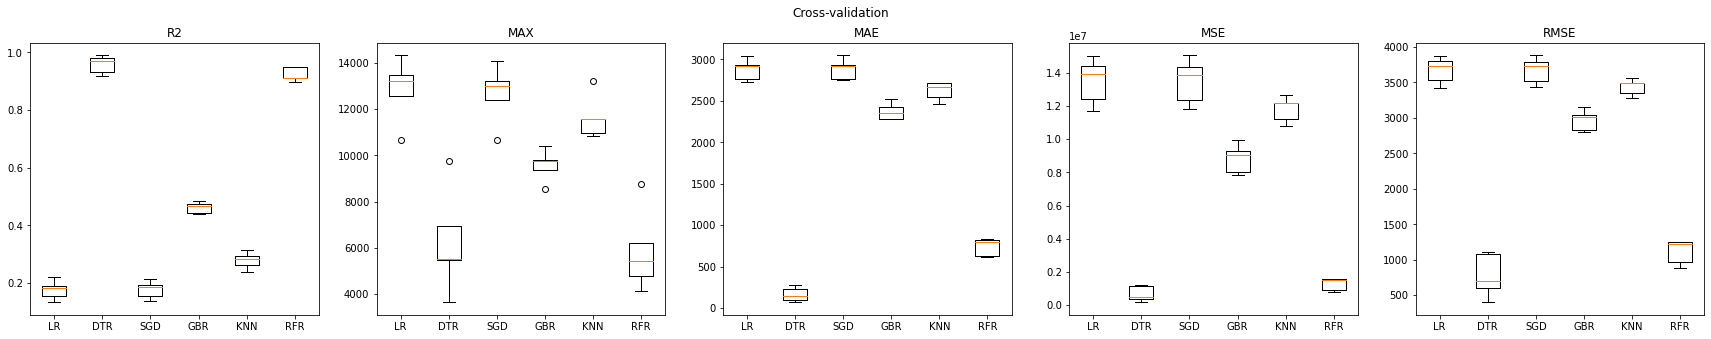

In [1540]:
r2_values = []
max_error_values = []
neg_mean_absolute_error_values = []
neg_mean_squared_error_values = []
neg_root_mean_squared_error_values = []

for name, est in estimators:
  # Cross validation
  score = cross_validate(est, X_train, y_train, cv=5,
                         scoring=['r2', 'max_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error'],
                         n_jobs=-1)

  # Abspeichern der Werte
  r2_values.append(score['test_r2'])
  max_error_values.append(-score['test_max_error'])
  neg_mean_absolute_error_values.append(-score['test_neg_mean_absolute_error'])
  neg_mean_squared_error_values.append(-score['test_neg_mean_squared_error'])
  neg_root_mean_squared_error_values.append(-score['test_neg_root_mean_squared_error'])

# Plotten der Werte
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(30, 5))

names = ['LR', 'DTR', 'SGD', 'GBR', 'KNN', 'RFR']

axs[0].boxplot(r2_values, labels=names)
axs[0].set_title('R2')
axs[1].boxplot(max_error_values, labels=names)
axs[1].set_title('MAX')
axs[2].boxplot(neg_mean_absolute_error_values, labels=names)
axs[2].set_title('MAE')
axs[3].boxplot(neg_mean_squared_error_values, labels=names)
axs[3].set_title('MSE')
axs[4].boxplot(neg_root_mean_squared_error_values, labels=names)
axs[4].set_title('RMSE')

plt.suptitle('Cross-validation')
plt.show()

In [1541]:
regression = 5

print(u'R²: {:.3f} \u00B1 {:.3f}'.format(np.mean(r2_values[regression]), np.std(r2_values[regression])))
print(u'MAX: {:,.0f} \u00B1 {:,.0f}'.format(np.mean(max_error_values[regression]), np.std(max_error_values[regression])))
print(u'MAE: {:,.0f} \u00B1 {:,.0f}'.format(np.mean(neg_mean_absolute_error_values[regression]), np.std(neg_mean_absolute_error_values[regression])))
print(u'MSE: {:,.0f} \u00B1 {:,.0f}'.format(np.mean(neg_mean_squared_error_values[regression]), np.std(neg_mean_squared_error_values[regression])))
print(u'RMSE: {:,.0f} \u00B1 {:,.0f}'.format(np.mean(neg_root_mean_squared_error_values[regression]), np.std(neg_root_mean_squared_error_values[regression])))

R²: 0.923 ± 0.021
MAX: 5,853 ± 1,615
MAE: 743 ± 94
MSE: 1,260,500 ± 335,811
RMSE: 1,112 ± 156


In [1542]:
from sklearn.tree import export_graphviz
import pydot

tree = rfr.estimators_[5]

export_graphviz(tree, out_file = 'tree.dot', feature_names = data.columns[:-1], rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')
